In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.font_manager as fm
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from keras_preprocessing.text import Tokenizer
plt.rc('font', family='NanumGothic') # For Windows
print(plt.rcParams['font.family'])

%matplotlib inline


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [1]:
new_zo = pd.read_csv("./data/zonan_new.csv", encoding="CP949")
print("#########데이터 생김새###########\n",new_zo)

col1 = ["발생해역", "기상상태", "발생유형", "선종", "톤수", "사고선박수"]
col2 = ["발생인원"]

new_X = new_zo.loc[:,col1]
new_Y = new_zo.loc[:,col2]
new_X

new_X["발생해역"] = new_X["발생해역"].str.replace(' ','')
new_X["발생해역"] = new_X["발생해역"].str.replace("영해-EEZ", "배타적경제수역")
new_X["발생해역"] = new_X["발생해역"].str.replace("EEZ-30마일이내", "경제수역30마일내")
new_X["발생해역"] = new_X["발생해역"].str.replace("EEZ30마일이내", "경제수역30마일내")

set(new_X["발생해역"])

def dummy_data(data, columns):
    for column in columns:
        data = pd.concat([data, pd.get_dummies(data[column], prefix = column)], axis=1)
        data = data.drop(column, axis=1)
    return data


dummy_columns = ["발생해역", "기상상태", "발생유형", "선종"]
new_X = dummy_data(new_X, dummy_columns)
new_X

model = sm.OLS(new_zo["발생인원"],new_X)
result = model.fit()
print("############정규화하기전 회귀분석###########\n",result.summary())
print("#############가중치값#############\n",line_fitter.coef_)
print(line_fitter.intercept_)

NameError: ignored

In [ ]:
new_XY =new_X
new_XY["발생인원"] = new_Y
new_XY

,톤수,사고선박수,발생해역_경제수역30마일내,발생해역_공해,발생해역_배타적경제수역,발생해역_영해,발생해역_외국해역,발생해역_항계내,발생해역_협수로,기상상태_양호,기상상태_저시정,기상상태_태풍경보,기상상태_태풍주의보,기상상태_풍랑경보,기상상태_풍랑주의보,기상상태_황천2급,기상상태_황천3급,기상상태_황천4급,기상상태_황천5급,기상상태_황천6급,발생유형_기관손상,발생유형_기타,발생유형_방향상실,발생유형_부유물감김,발생유형_안전저해,발생유형_운항저해,발생유형_작업 중 인명사상,발생유형_접촉,발생유형_조난,발생유형_좌초/좌주,발생유형_추진기손상,발생유형_충돌,발생유형_침수/침몰/전복,발생유형_키손상,발생유형_화재폭발,선종_관공선,선종_기타,선종_낚시어선,선종_보트/수상오토바이,선종_어선,선종_여객선/유람선,선종_예부선,선종_요트,선종_유조선,선종_화물선,발생인원
0,-0.122313,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,-0.118843,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,12
2,0.053394,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,15
3,-0.121830,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,3
4,-0.121384,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20171,-0.113126,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,9
20172,-0.121079,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2
20173,-0.099332,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3
20174,0.001822,3,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,54


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


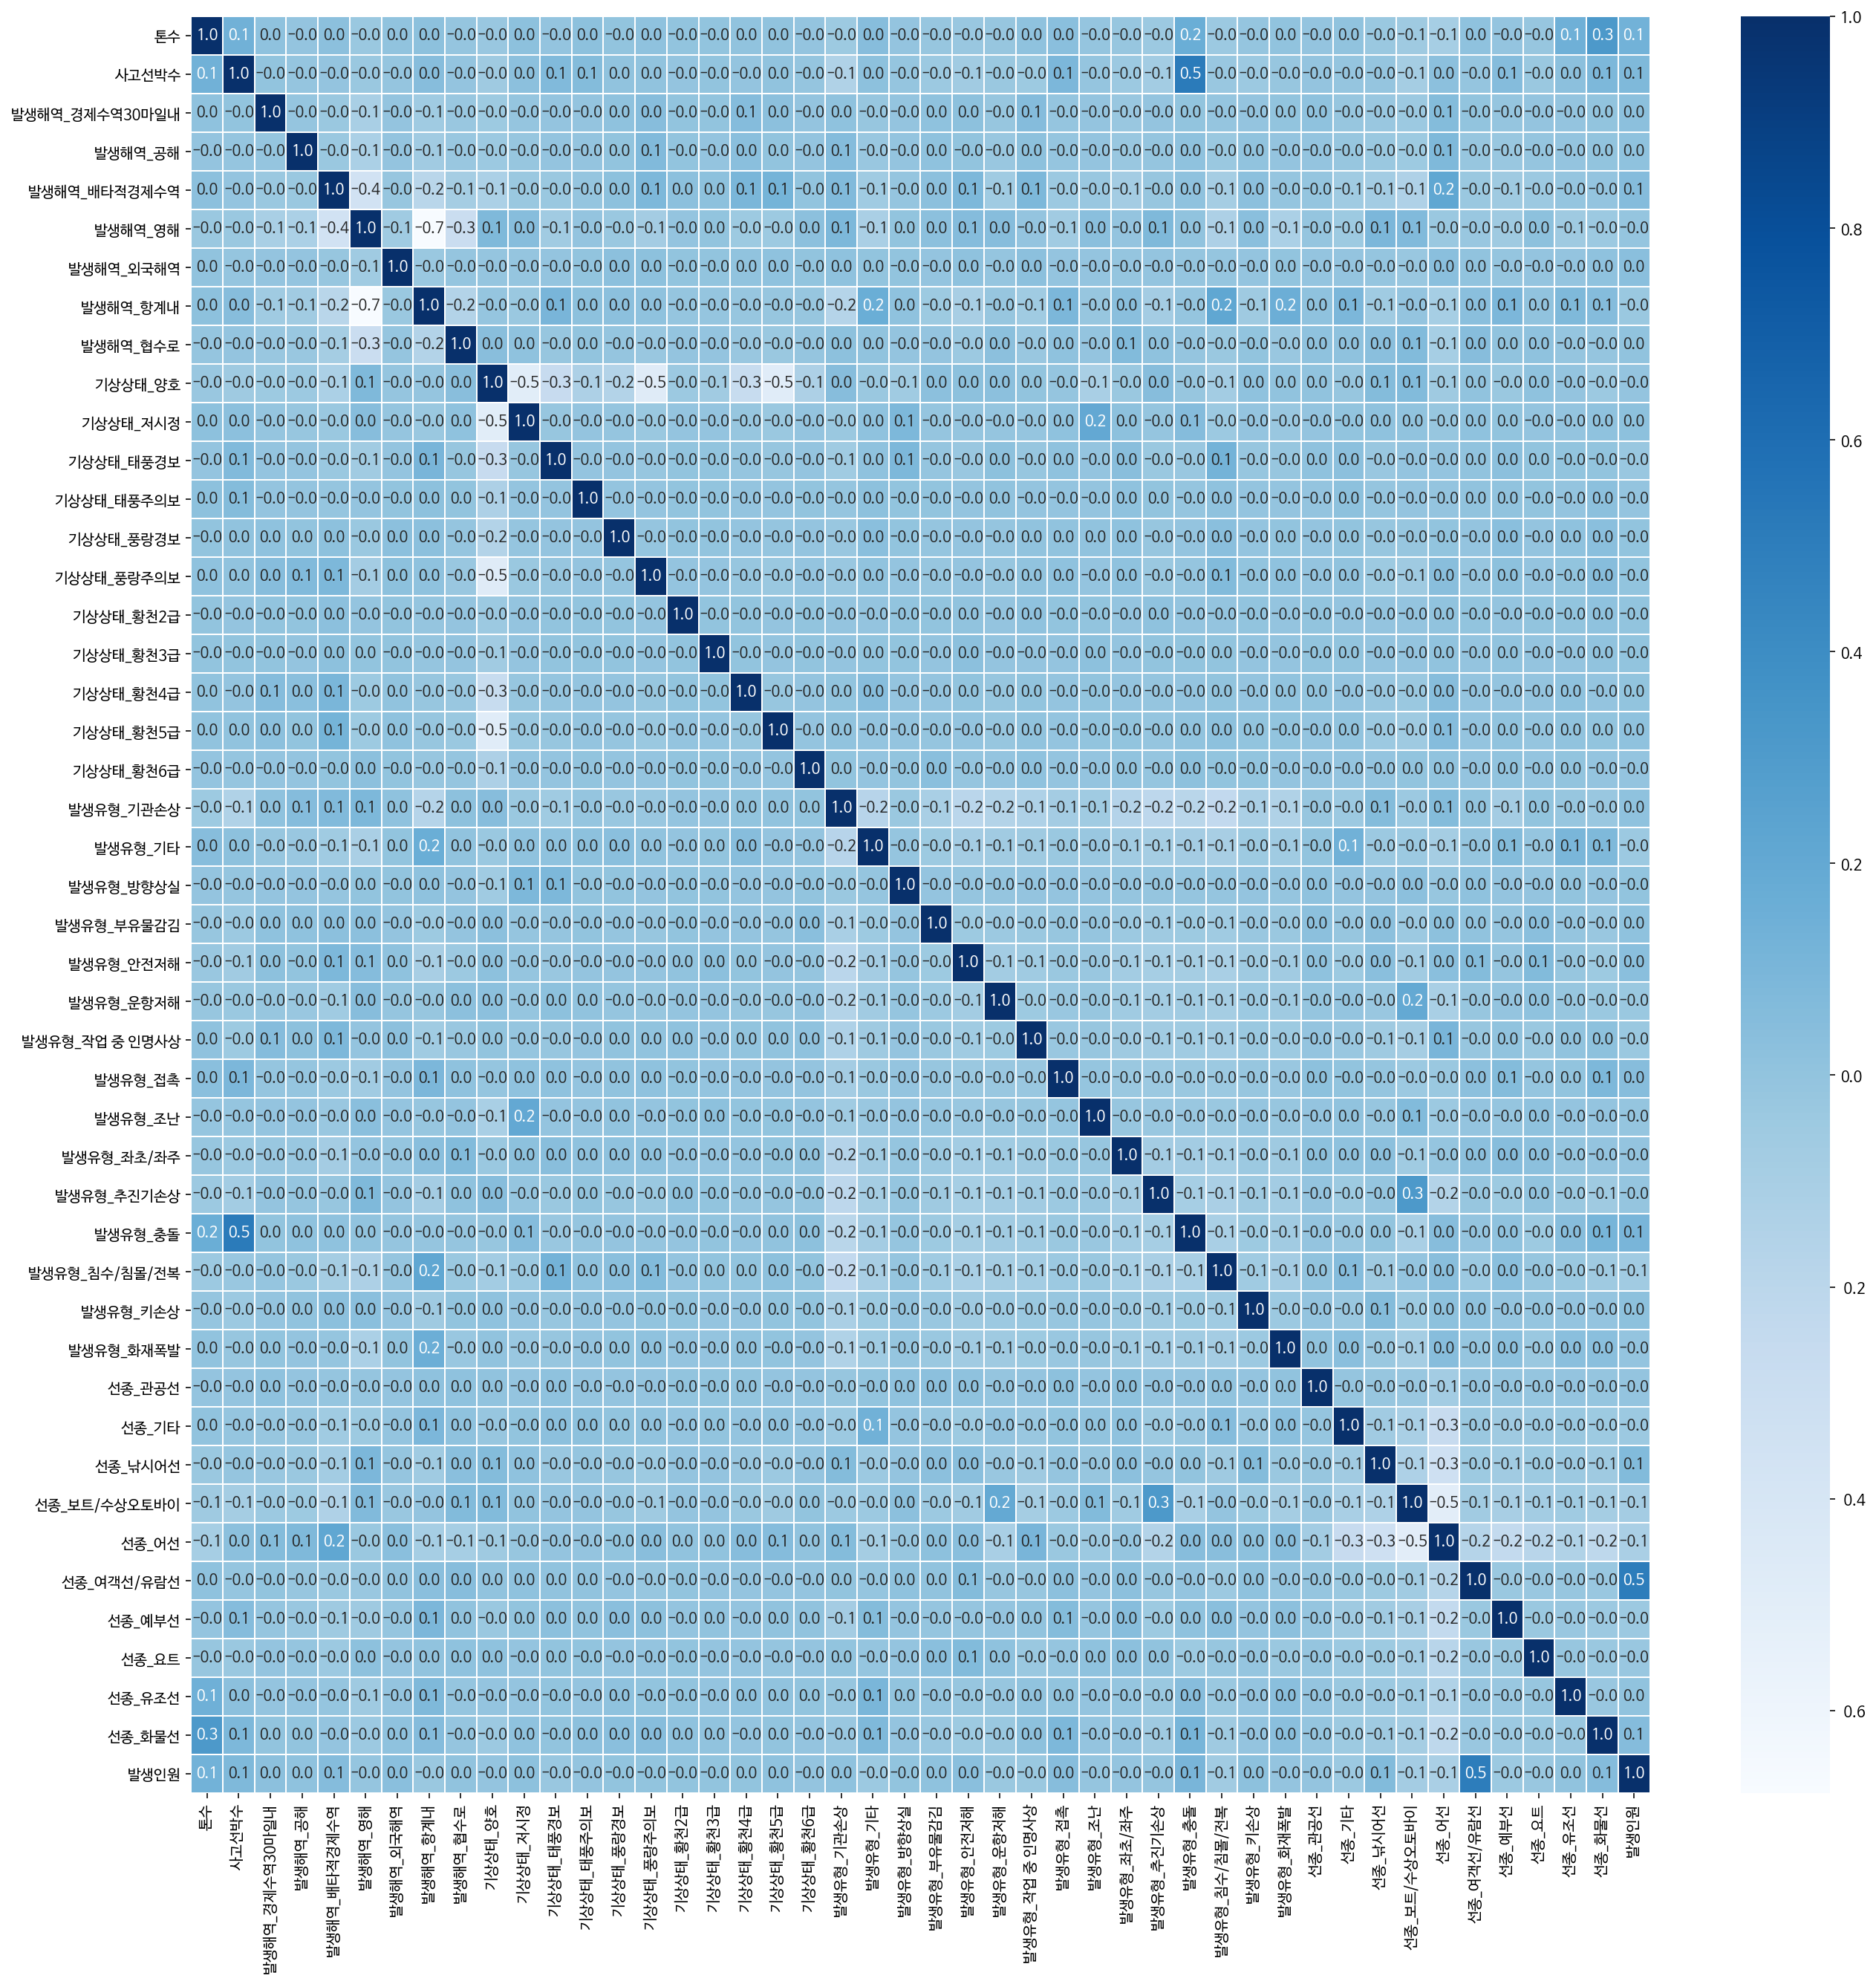

In [ ]:
plt.figure(figsize=(22,22))
sns.heatmap(data = new_XY.corr(), annot=True, fmt = '.1f',linewidths=.5, cmap='Blues')
#plt.savefig('/content/gdrive/Shared drives/데이터청년캠퍼스-1조/data/ffn.png')

In [ ]:
pip install xgboost

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from keras_preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from IPython.display import display
import tensorflow as tf
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import xgboost as xgb ## XGBoost 불러오기
from xgboost import plot_importance ## Feature Importance를 불러오기 위함
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


plt.rc('font', family='NanumBarunGothic') 

In [ ]:
zo = pd.read_csv("./data/zonan_new.csv",encoding="CP949")
zo["발생인원_범주형"]= zo["발생인원"]
zo["발생인원_범주형"] = zo["발생인원_범주형"].apply(lambda x: 0 if x<=5 else 1 if (x<=30) else 2 if (x<=150) else 3)
zo

,발생일자,시간,시,관할해경서,발생해역,위도,경도,장 소,기상상태,발생원인,발생유형,사고선박수,발생인원,구조,부상,사망,실종,선종,톤수,위도.1,경도.1,발생인원_범주형
0,2019-12-31,22:04,22,포항,영해,0 | 0 | 0,0 | 0 | 0,경북 포항시 구룡포해수욕장 북방파제 슬립웨이,양호,관리소홀,기타,1,0,0,0,0,0,보트/수상오토바이,1.07,0.000000,0.000000,0
1,2019-12-31,15:13,15,포항,영해,35 | 52 | 3,129 | 45 | 55,경북 포항시 양포항 동방 12해리 해상,양호,운항부주의,충돌,1,12,12,0,0,0,어선,29.00,35.867500,129.765278,1
2,2019-12-31,15:13,15,포항,영해,35 | 52 | 3,129 | 45 | 55,경북 포항시 양포항 동방 12해리 해상,양호,운항부주의,충돌,1,15,15,0,0,0,화물선,1415.00,35.867500,129.765278,1
3,2019-12-31,9:33,9,통영,협수로,34 | 41 | 6,128 | 3 | 59,남해군 미조면 고도 북동방 0.25해리 해상,양호,운항부주의,부유물감김,1,3,3,0,0,0,어선,4.96,34.685000,128.066389,0
4,2019-12-31,8:38,8,군산,항계 내,35 | 59 | 18,126 | 41 | 43,전라북도 군산시 해망동 소룡포구,양호,관리소홀,침수/침몰/전복,1,0,0,0,0,0,어선,8.55,35.988333,126.695278,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19916,2011-01-03,10:20,10,서귀포,영해-EEZ,32|19|00,125|27|00,마라도 남서방 63마일 해상,풍랑주의보,정비불량,기관손상,1,9,9,0,0,0,어선,75.00,32.316667,125.450000,1
19917,2011-01-02,21:35,21,여수,협수로,34|14|52,127|14|33,여수 삼산면 대동리 방파제 끝단,황천5급,운항부주의,좌초/좌주,1,2,2,0,0,0,기타,11.00,34.247778,127.242500,0
19918,2011-01-02,0:38,0,인천,영해-EEZ,37|19|00,124|56|00,덕적도 서방 55마일 해상,황천5급,정비불량,기관손상,1,3,3,0,0,0,유조선,186.00,37.316667,124.933333,0
19919,2011-01-01,20:00,20,서귀포,영해,33|12|30,126|18|30,서귀화순 남방 1M,풍랑주의보,기상악화,좌초/좌주,3,54,54,0,0,0,어선,1000.00,33.208333,126.308333,2


In [ ]:
col1 = ["발생해역", "기상상태", "발생유형", "선종", "사고선박수","톤수"]
col2 = ["발생인원_범주형"]
col3 = ["발생해역", "기상상태", "발생유형", "선종", "사고선박수","톤수","발생인원_범주형"]

zo_df = zo.loc[:, col3]

zo_df["발생해역"] = zo_df["발생해역"].str.replace(' ','')
zo_df["발생해역"] = zo_df["발생해역"].str.replace("영해-EEZ", "배타적경제수역")
zo_df["발생해역"] = zo_df["발생해역"].str.replace("EEZ-30마일이내", "경제수역30마일내")
zo_df["발생해역"] = zo_df["발생해역"].str.replace("EEZ30마일이내", "경제수역30마일내")

set(zo_df["발생해역"])

def dummy_data(data, columns):
    for column in columns:
        data = pd.concat([data, pd.get_dummies(data[column], prefix = column)], axis=1)
        data = data.drop(column, axis=1)
    return data


dummy_columns = ["발생해역", "기상상태", "발생유형", "선종"]
zo_df1 = dummy_data(zo_df, dummy_columns)
zo_df1

,사고선박수,톤수,발생인원_범주형,발생해역_경제수역30마일내,발생해역_공해,발생해역_배타적경제수역,발생해역_영해,발생해역_외국해역,발생해역_항계내,발생해역_협수로,기상상태_양호,기상상태_저시정,기상상태_풍랑경보,기상상태_풍랑주의보,기상상태_황천4급,기상상태_황천5급,기상상태_황천6급,발생유형_기관손상,발생유형_기타,발생유형_방향상실,발생유형_부유물감김,발생유형_안전저해,발생유형_운항저해,발생유형_작업 중 인명사상,발생유형_접촉,발생유형_조난,발생유형_좌초/좌주,발생유형_추진기손상,발생유형_충돌,발생유형_침수/침몰/전복,발생유형_키손상,발생유형_화재폭발,선종_관공선,선종_기타,선종_낚시어선,선종_보트/수상오토바이,선종_어선,선종_여객선/유람선,선종_예부선,선종_요트,선종_유조선,선종_화물선
0,1,1.07,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,1,29.00,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,1,1415.00,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1,4.96,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,1,8.55,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19916,1,75.00,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
19917,1,11.00,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
19918,1,186.00,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
19919,3,1000.00,2,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
zo_y =zo_df1["발생인원_범주형"]

#zo_y = pd.get_dummies(zo_y).values
del zo_df1["발생인원_범주형"]
zo_x = zo_df1


In [ ]:

x_train, x_test, y_train, y_test = train_test_split(zo_x, zo_y, train_size=0.7, test_size=0.3, random_state=0 )
print("독립 train : {}\n독립 test : {}\n종속 trina :{}\n종속 test :{}".format(x_train.shape,x_test.shape,y_train.shape,y_test.shape))

독립 train : (13944, 41)
독립 test : (5977, 41)
종속 trina :(13944,)
종속 test :(5977,)


In [ ]:
xgb_param_grid = {
    'n_estimators' : [100,300,500],
    'learning_rate' : [0.01,0.05,0.1],
    'max_depth' : [3,5]
}

xgb_grid = GridSearchCV(xgb, param_grid = xgb_param_grid, scoring='accuracy', n_jobs=-1, verbose=1)
xgb_grid.fit(x_train,y_train)

In [ ]:
from sklearn.model_selection import KFold, GridSearchCV
from xgboost import XGBClassifier



# 1번 2번

model=XGBClassifier()
param_grid={'booster' :['gbtree'],
                 'silent':[True],
                 'max_depth':[1,3,5],
                 'min_child_weight':[1,3,5],
                 'gamma':[0,1,2,3],
                 'nthread':[4],
                 'colsample_bytree':[0.5,0.8],
                 'colsample_bylevel':[0.9],
                 'n_estimators':[100,200,300],
                 'objective':['binary:logistic'],
                 'random_state':[0]}

# 3번
cv=KFold(n_splits=4, random_state=1)

# 4번
gcv=GridSearchCV(model, param_grid=param_grid, cv=cv, scoring='accuracy', n_jobs=4)

# 5번
gcv.fit(x_train, y_train)
print('final params', gcv.best_params_)   # 최적의 파라미터 값 출력
print('best score', gcv.best_score_)      # 최고의 점수

final params {'booster': 'gbtree', 'colsample_bylevel': 0.9, 'colsample_bytree': 0.5, 'gamma': 1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 300, 'nthread': 4, 'objective': 'binary:logistic', 'random_state': 2, 'silent': True}
best score 0.8664658634538153


In [ ]:
xgb = XGBClassifier(n_estimators =300,
                    max_depth=5,
                    colsampe_bytree = 0.5,
                    gamma = 1,
                    min_child_weight = 1,
                    nthread=4,
                    silent=True,
                    colsample_bylevel = 0.9,
                    random_state = 0
                    )
evals = [(x_test,y_test)]
xgb.fit(x_train,y_train, early_stopping_rounds = 100, eval_metric = "mlogloss", eval_set = evals, verbose=1)

[0]	validation_0-mlogloss:1.2544
Will train until validation_0-mlogloss hasn't improved in 100 rounds.
[1]	validation_0-mlogloss:1.14628
[2]	validation_0-mlogloss:1.05642
[3]	validation_0-mlogloss:0.980258
[4]	validation_0-mlogloss:0.914729
[5]	validation_0-mlogloss:0.858234
[6]	validation_0-mlogloss:0.808313
[7]	validation_0-mlogloss:0.763894
[8]	validation_0-mlogloss:0.724525
[9]	validation_0-mlogloss:0.688531
[10]	validation_0-mlogloss:0.656645
[11]	validation_0-mlogloss:0.628129
[12]	validation_0-mlogloss:0.603058
[13]	validation_0-mlogloss:0.580507
[14]	validation_0-mlogloss:0.559959
[15]	validation_0-mlogloss:0.541206
[16]	validation_0-mlogloss:0.524304
[17]	validation_0-mlogloss:0.509645
[18]	validation_0-mlogloss:0.49665
[19]	validation_0-mlogloss:0.484742
[20]	validation_0-mlogloss:0.473858
[21]	validation_0-mlogloss:0.464227
[22]	validation_0-mlogloss:0.455146
[23]	validation_0-mlogloss:0.446896
[24]	validation_0-mlogloss:0.439502
[25]	validation_0-mlogloss:0.432573
[26]	vali

XGBClassifier(base_score=0.5, booster='gbtree', colsampe_bytree=0.5,
              colsample_bylevel=0.9, colsample_bynode=1, colsample_bytree=1,
              gamma=1, learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=300, n_jobs=1,
              nthread=4, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=True, subsample=1, verbosity=1)

In [ ]:
y_pred = xgb.predict(x_test)
confusion = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print('\n정확도: {:.4f}'.format(accuracy))


정확도: 0.8672


<Figure size 2160x720 with 0 Axes>

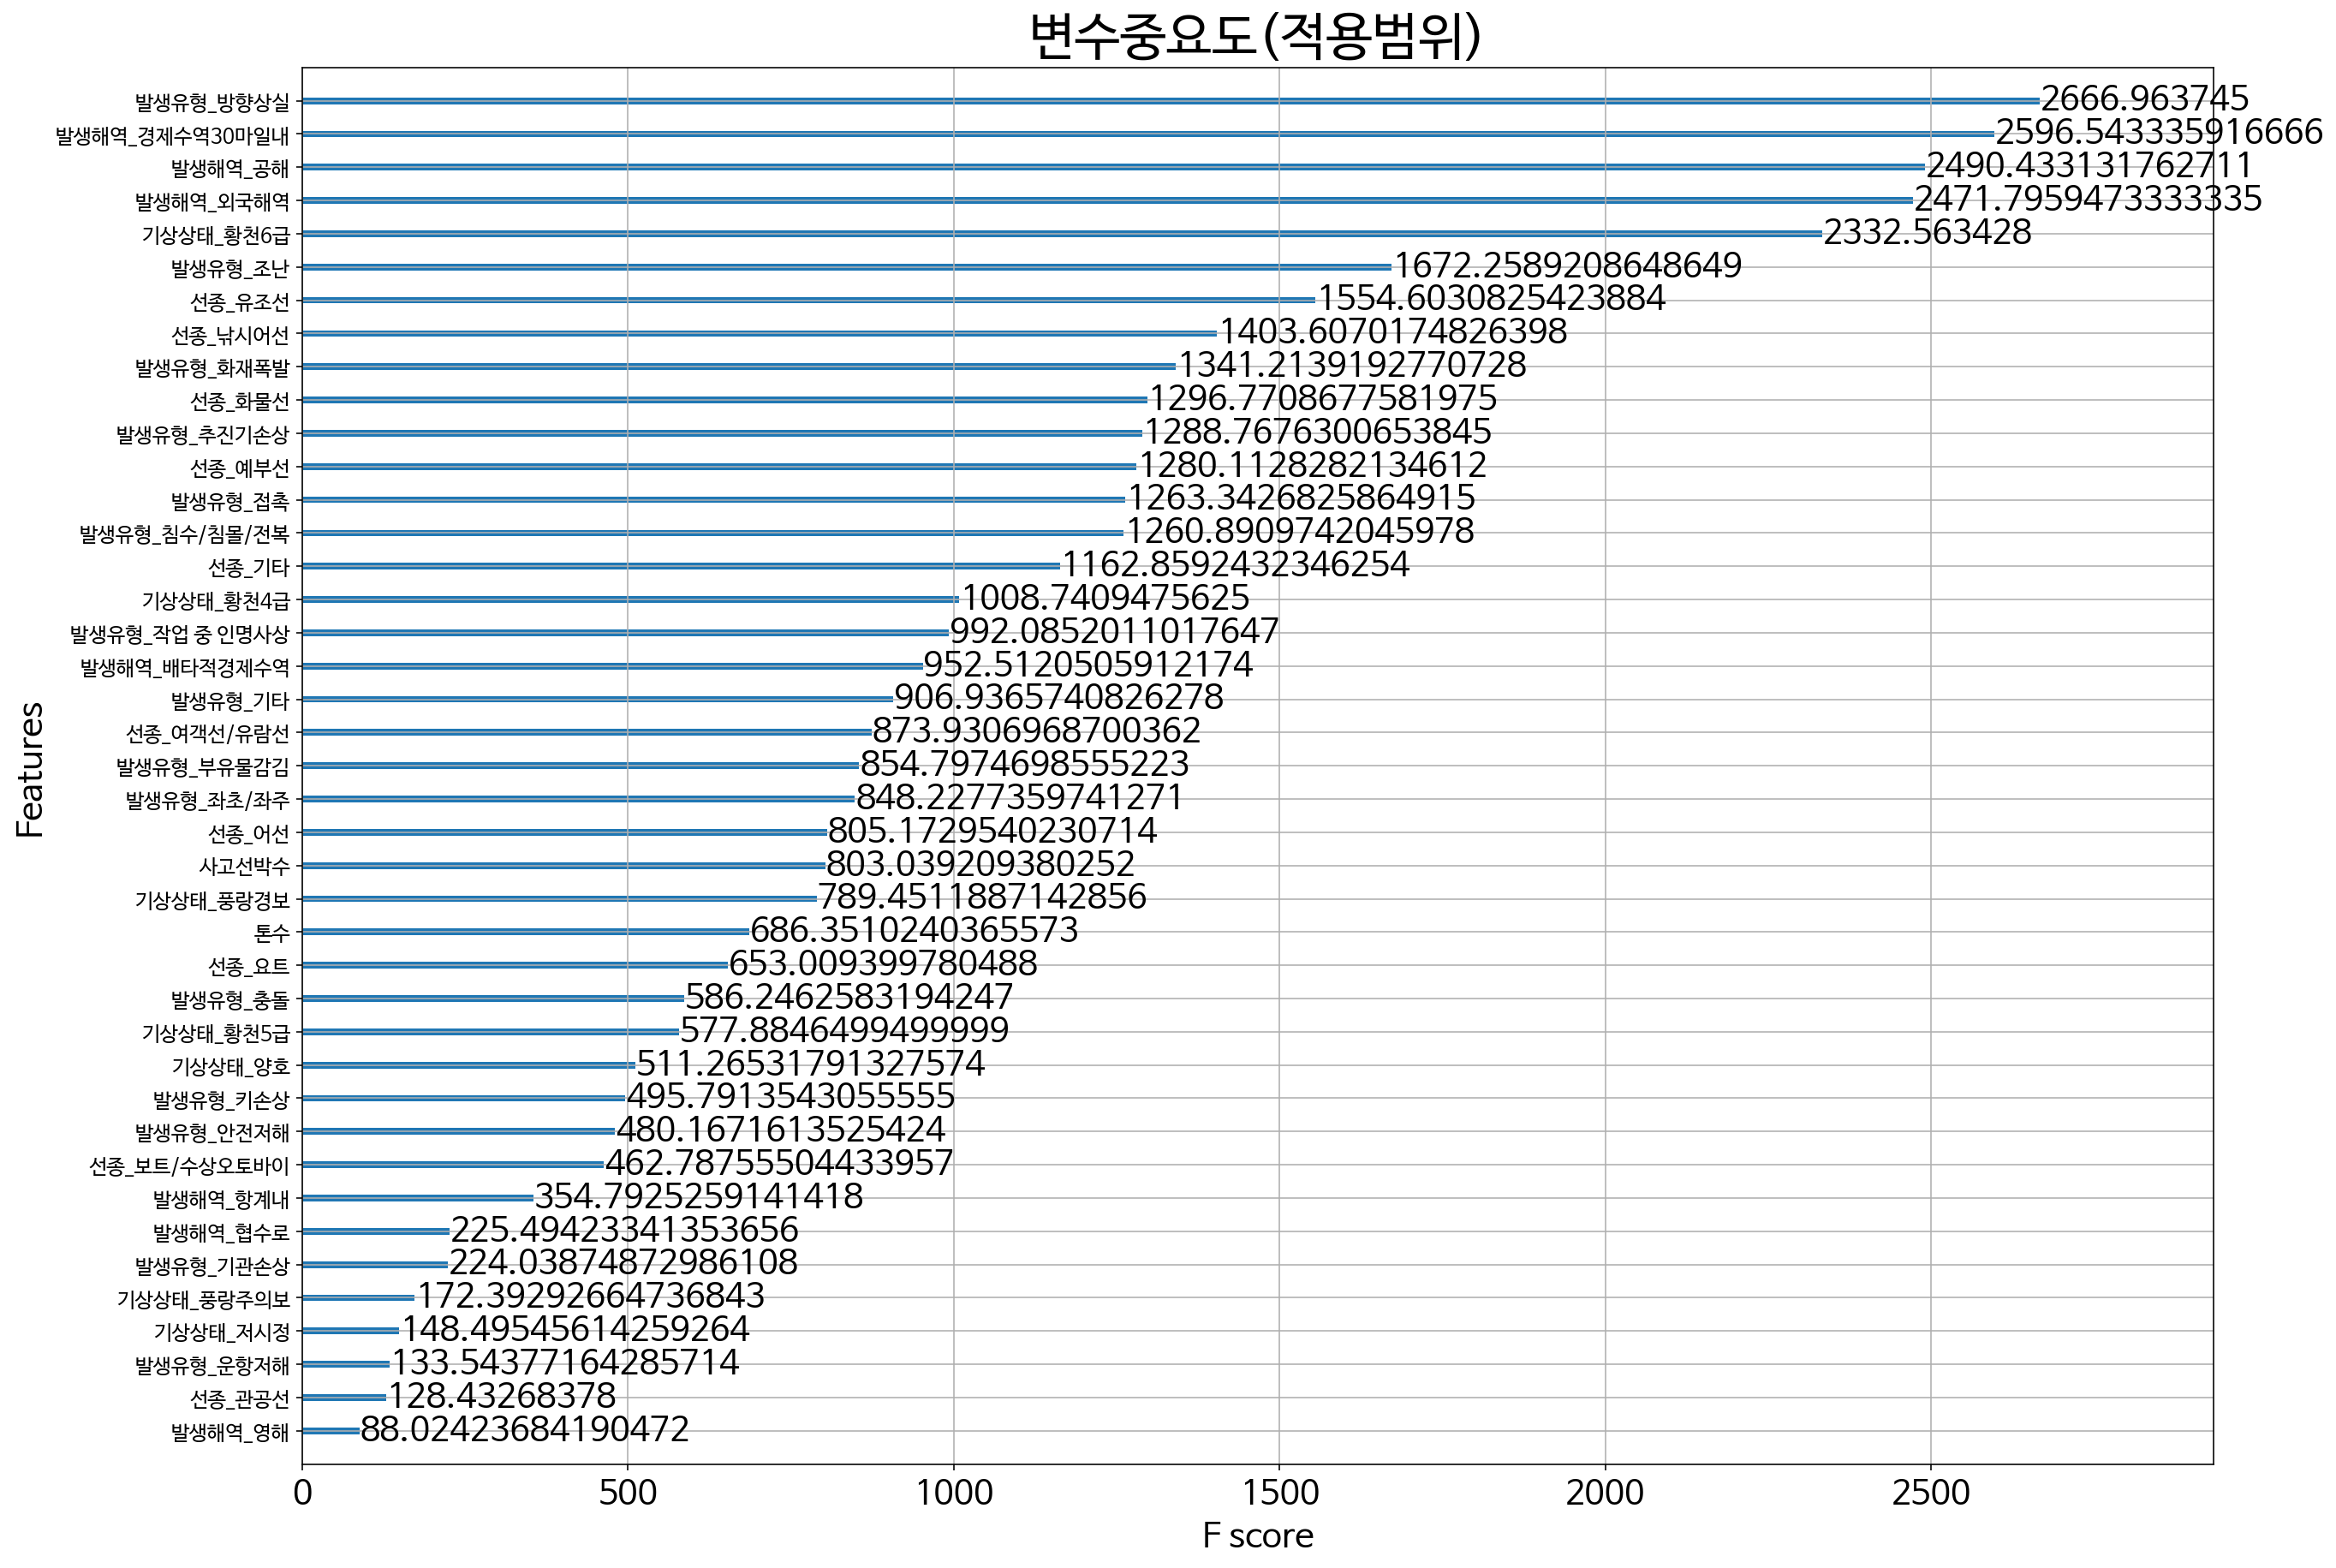

In [ ]:
plt.figure(figsize=(30, 10))
plt.rcParams["figure.figsize"] = (20,15)
plt.rc('font', size = 20)
plt.rc('axes', titlesize = 30)
plt.rc('axes', labelsize = 20)
plt.rc('xtick', labelsize = 20)
plt.rc('ytick', labelsize = 12)
fig, ax = plt.subplots()
plot_importance(xgb, ax=ax, importance_type="cover", title = "변수중요도(적용범위)")
plt.savefig("/content/gdrive/Shared drives/데이터청년캠퍼스-1조/im01.png")

<Figure size 2160x720 with 0 Axes>

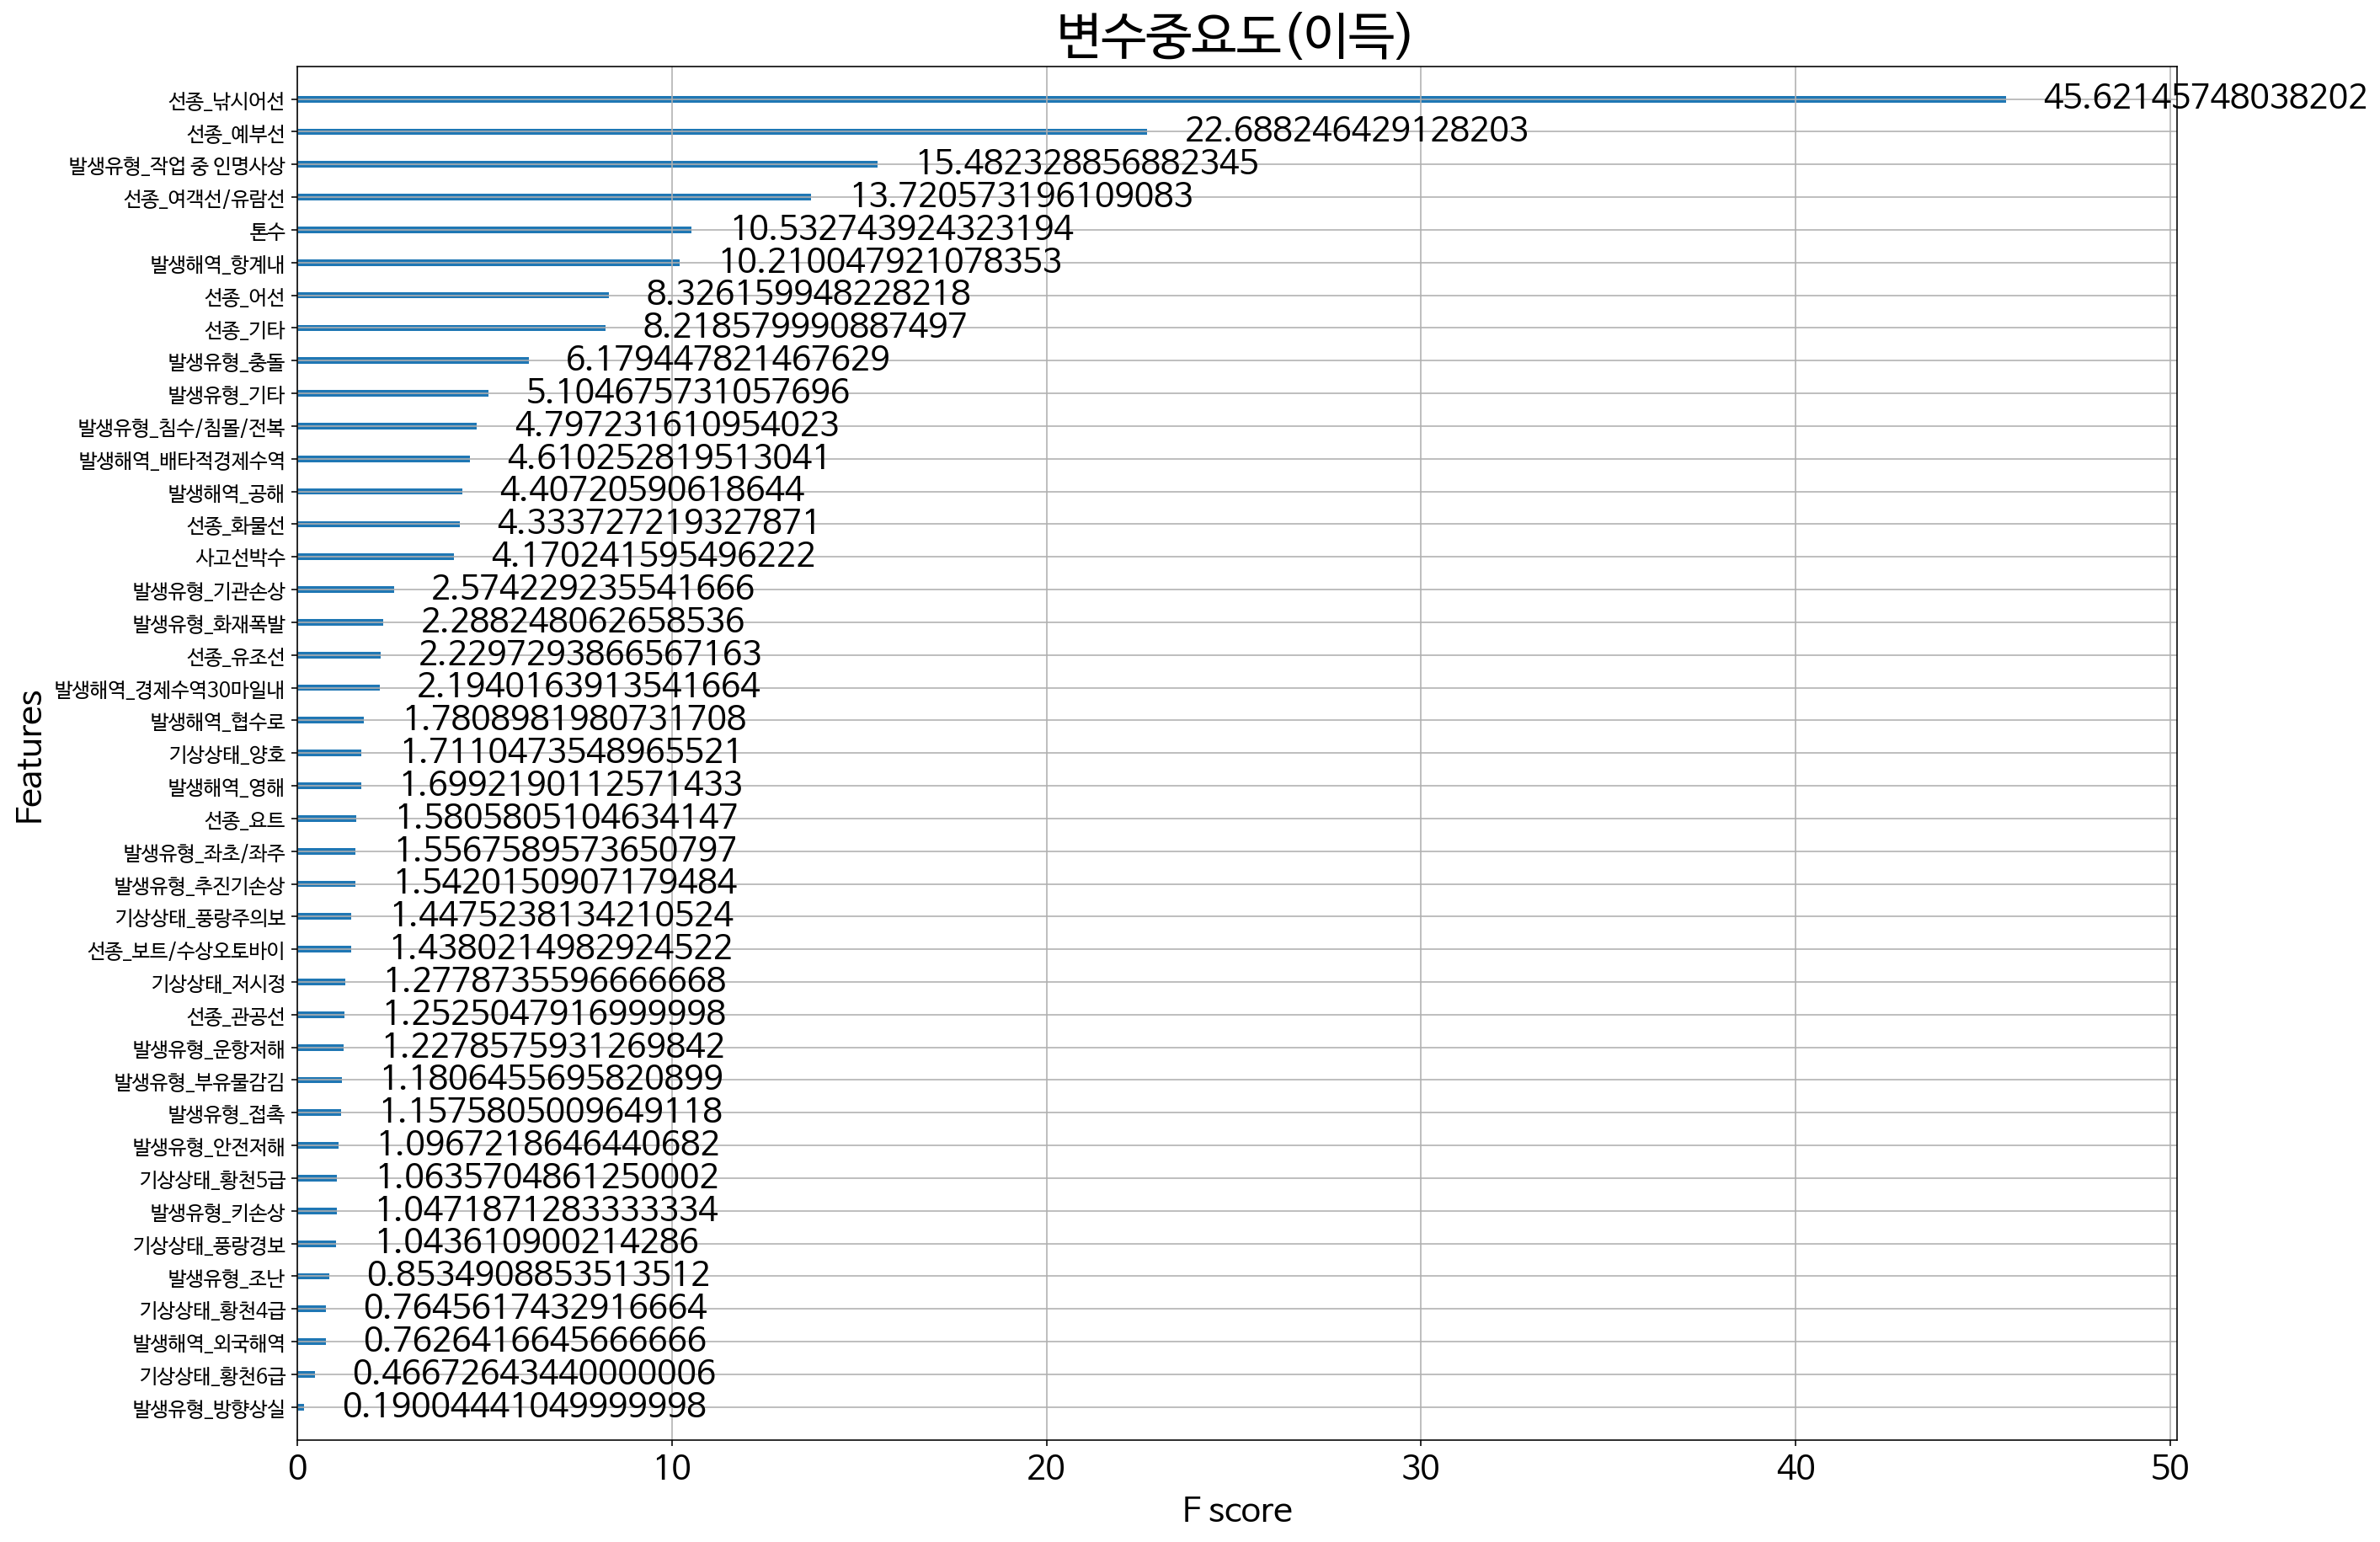

In [ ]:
plt.figure(figsize=(30, 10))
plt.rcParams["figure.figsize"] = (20,15)
plt.rc('font', size = 20)
plt.rc('axes', titlesize = 30)
plt.rc('axes', labelsize = 20)
plt.rc('xtick', labelsize = 20)
plt.rc('ytick', labelsize = 12)
fig, ax = plt.subplots()
plot_importance(xgb, ax=ax, importance_type="gain",  title = "변수중요도(이득)")
plt.savefig("/content/gdrive/Shared drives/데이터청년캠퍼스-1조/im02.png")

<Figure size 2160x720 with 0 Axes>

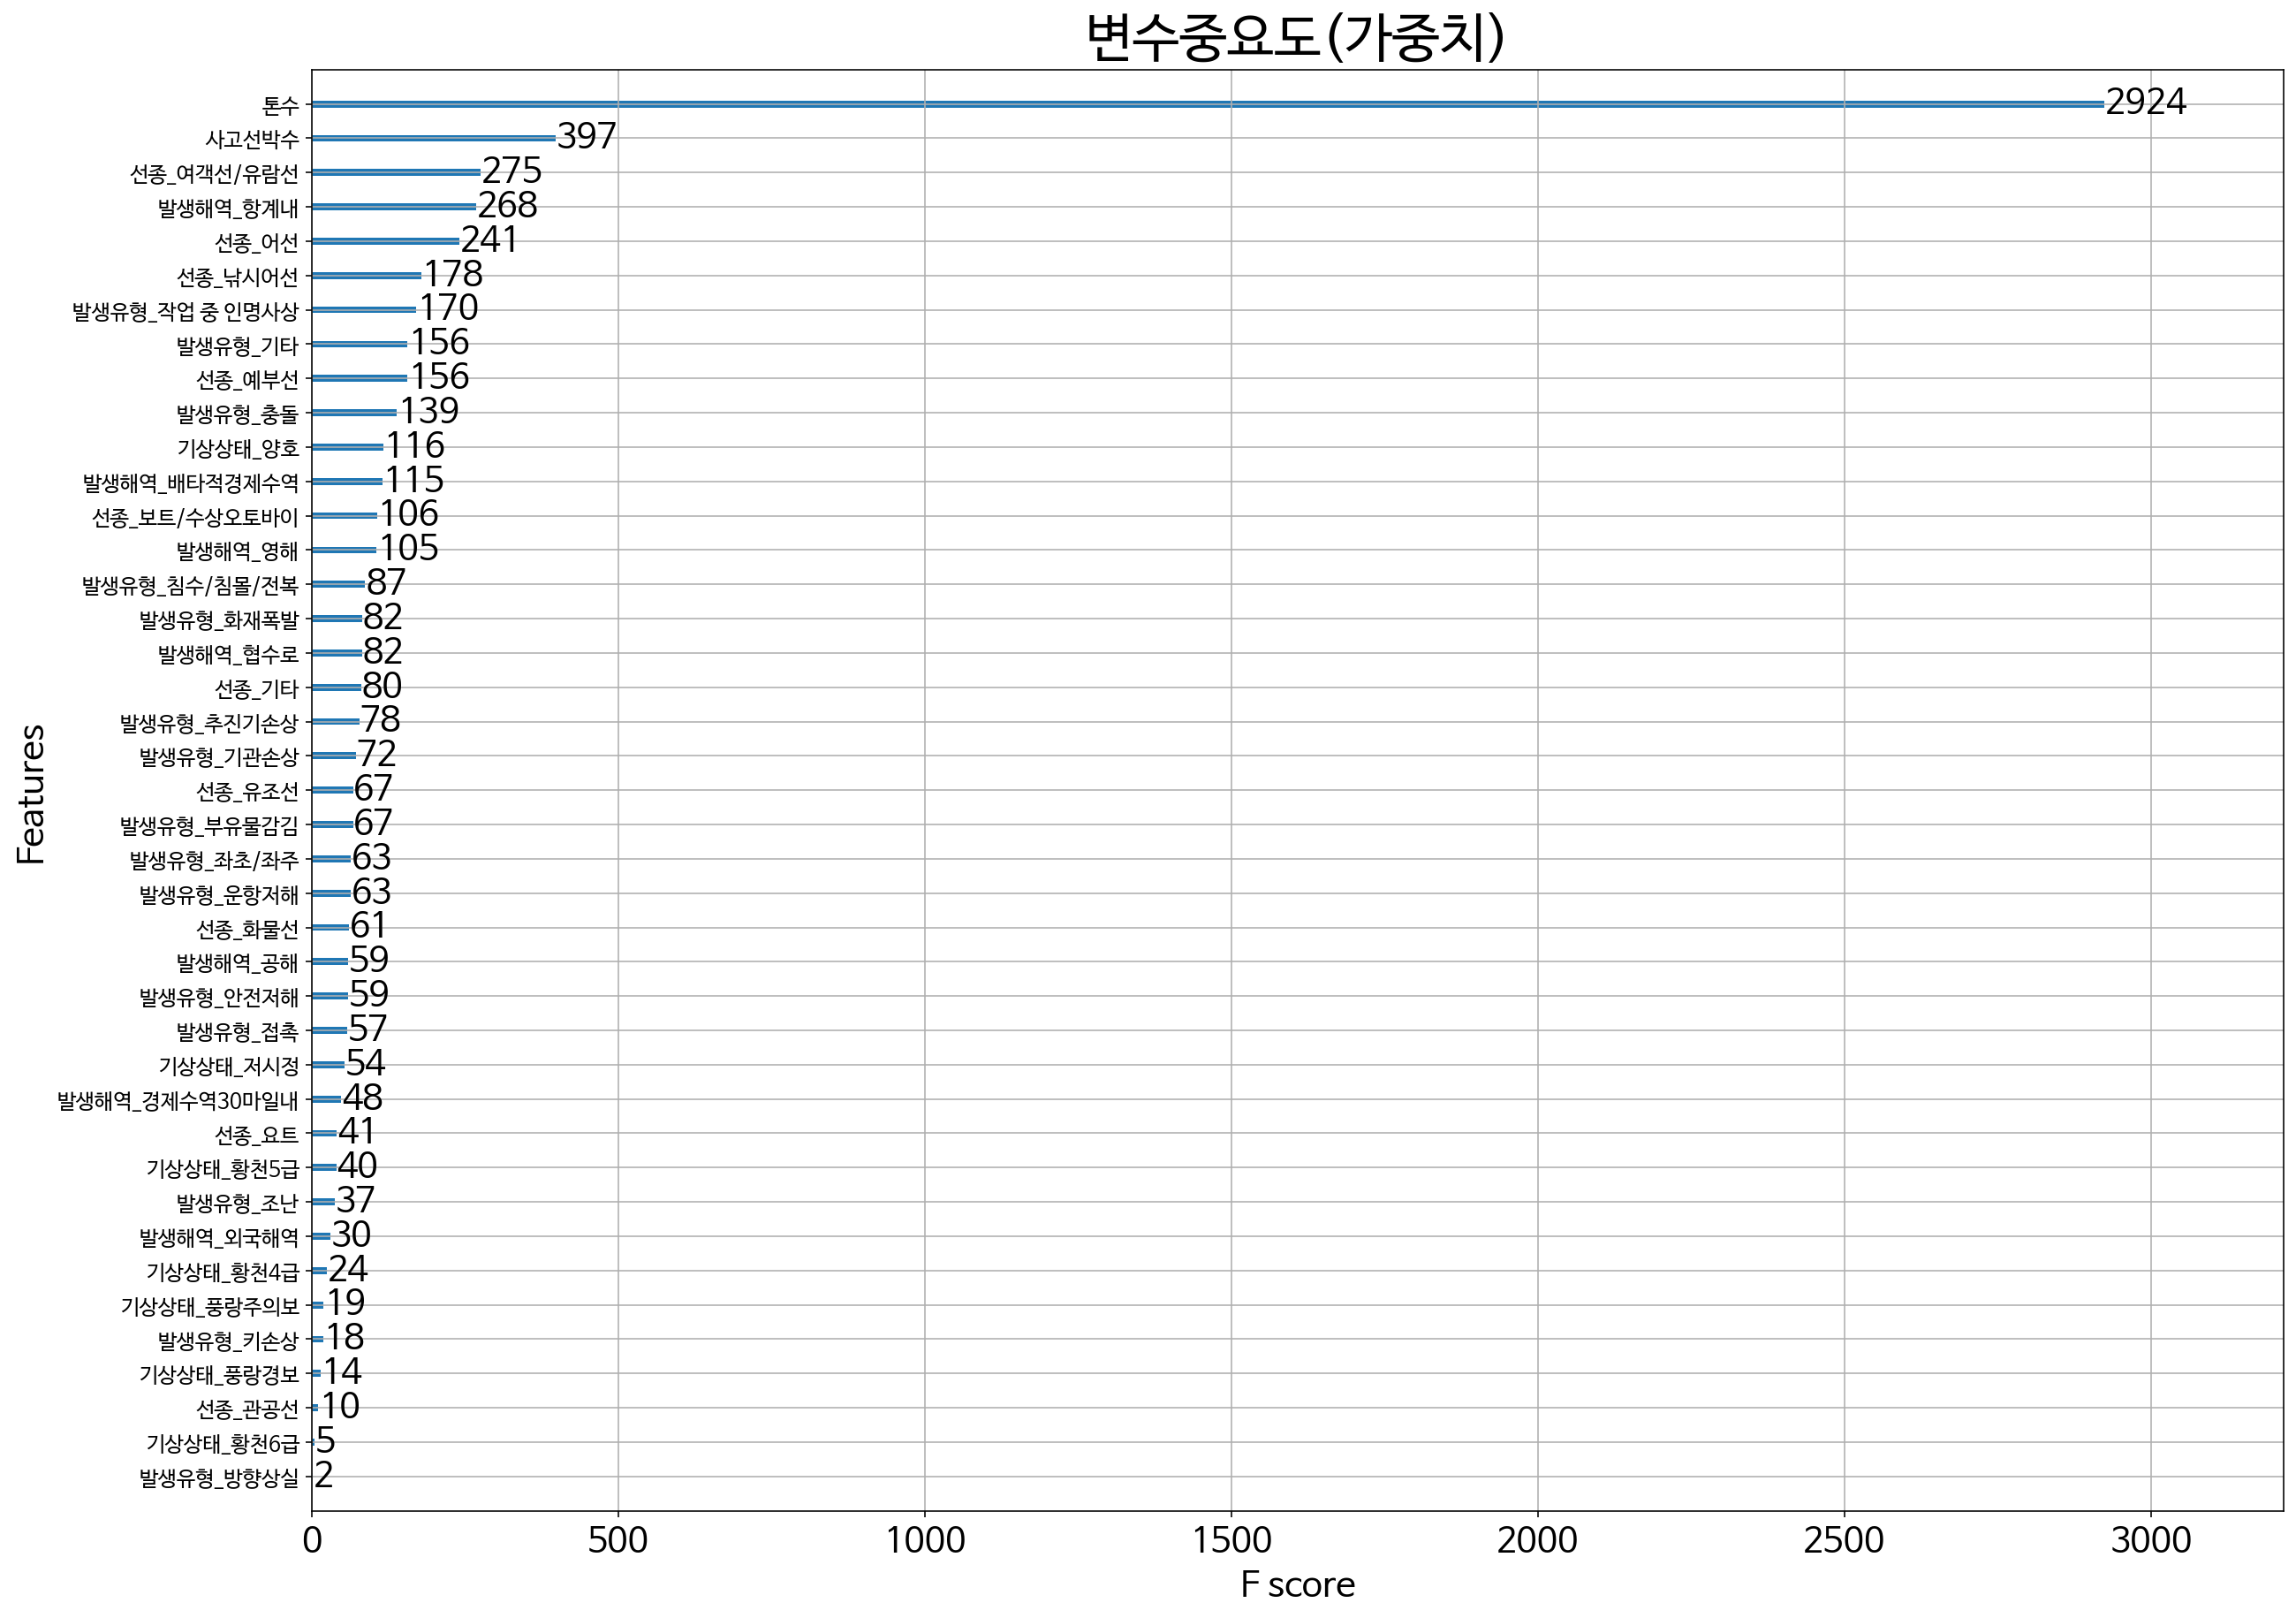

In [ ]:
plt.figure(figsize=(30, 10))
plt.rcParams["figure.figsize"] = (20,15)
plt.rc('font', size = 20)
plt.rc('axes', titlesize = 30)
plt.rc('axes', labelsize = 20)
plt.rc('xtick', labelsize = 20)
plt.rc('ytick', labelsize = 12)
fig, ax = plt.subplots()
plot_importance(xgb, ax=ax,  title = "변수중요도(가중치)")
plt.savefig("/content/gdrive/Shared drives/데이터청년캠퍼스-1조/im03.png")

https://aldente0630.github.io/data-science/2018/12/10/interpretable_ml_with_xgb.html

In [ ]:
test_data = zo_x
test_data = test_data.drop(test_data.index)

In [ ]:
test_data

,사고선박수,톤수,발생해역_경제수역30마일내,발생해역_공해,발생해역_배타적경제수역,발생해역_영해,발생해역_외국해역,발생해역_항계내,발생해역_협수로,기상상태_양호,기상상태_저시정,기상상태_풍랑경보,기상상태_풍랑주의보,기상상태_황천4급,기상상태_황천5급,기상상태_황천6급,발생유형_기관손상,발생유형_기타,발생유형_방향상실,발생유형_부유물감김,발생유형_안전저해,발생유형_운항저해,발생유형_작업 중 인명사상,발생유형_접촉,발생유형_조난,발생유형_좌초/좌주,발생유형_추진기손상,발생유형_충돌,발생유형_침수/침몰/전복,발생유형_키손상,발생유형_화재폭발,선종_관공선,선종_기타,선종_낚시어선,선종_보트/수상오토바이,선종_어선,선종_여객선/유람선,선종_예부선,선종_요트,선종_유조선,선종_화물선


In [ ]:
x1 = 1
x2 = 150
x3 = "발생해역_경제수역30마일내"
x4 = "기상상태_양호"
x5 = "발생유형_접촉"
x6 = "선종_어선"

new_data = {'사고선박수':x1, '톤수':x2, x3:1,x4:1,x5:1,x6:1}

In [ ]:
test_data=test_data.append(new_data , ignore_index=True)
test_data = test_data.fillna(0)

In [ ]:
test_data

,사고선박수,톤수,발생해역_경제수역30마일내,발생해역_공해,발생해역_배타적경제수역,발생해역_영해,발생해역_외국해역,발생해역_항계내,발생해역_협수로,기상상태_양호,기상상태_저시정,기상상태_풍랑경보,기상상태_풍랑주의보,기상상태_황천4급,기상상태_황천5급,기상상태_황천6급,발생유형_기관손상,발생유형_기타,발생유형_방향상실,발생유형_부유물감김,발생유형_안전저해,발생유형_운항저해,발생유형_작업 중 인명사상,발생유형_접촉,발생유형_조난,발생유형_좌초/좌주,발생유형_추진기손상,발생유형_충돌,발생유형_침수/침몰/전복,발생유형_키손상,발생유형_화재폭발,선종_관공선,선종_기타,선종_낚시어선,선종_보트/수상오토바이,선종_어선,선종_여객선/유람선,선종_예부선,선종_요트,선종_유조선,선종_화물선
0,1.0,150.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
xgb.predict(test_data)

array([1])